In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
import dataset_generator


In [ ]:
figure_num = 200
figure_point_cnt = 200
deterministic_param_scatter = False
p=3
sorted = True
deterministic_scatter = True
lw = [1, 1, 0]
up = [10, 5, 45]
param_names = ["Height", "Radius", "Rotation around X"]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p, size=figure_num, 
                                    lw = lw, up = up)
figures = dataset_generator.generate_array_of_figures(control_vars, cyl.generate_cylinder_points, noise_level=0,
                                             min_num_points=figure_point_cnt)
k = 10
c = 15000
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

0.9105177853614708


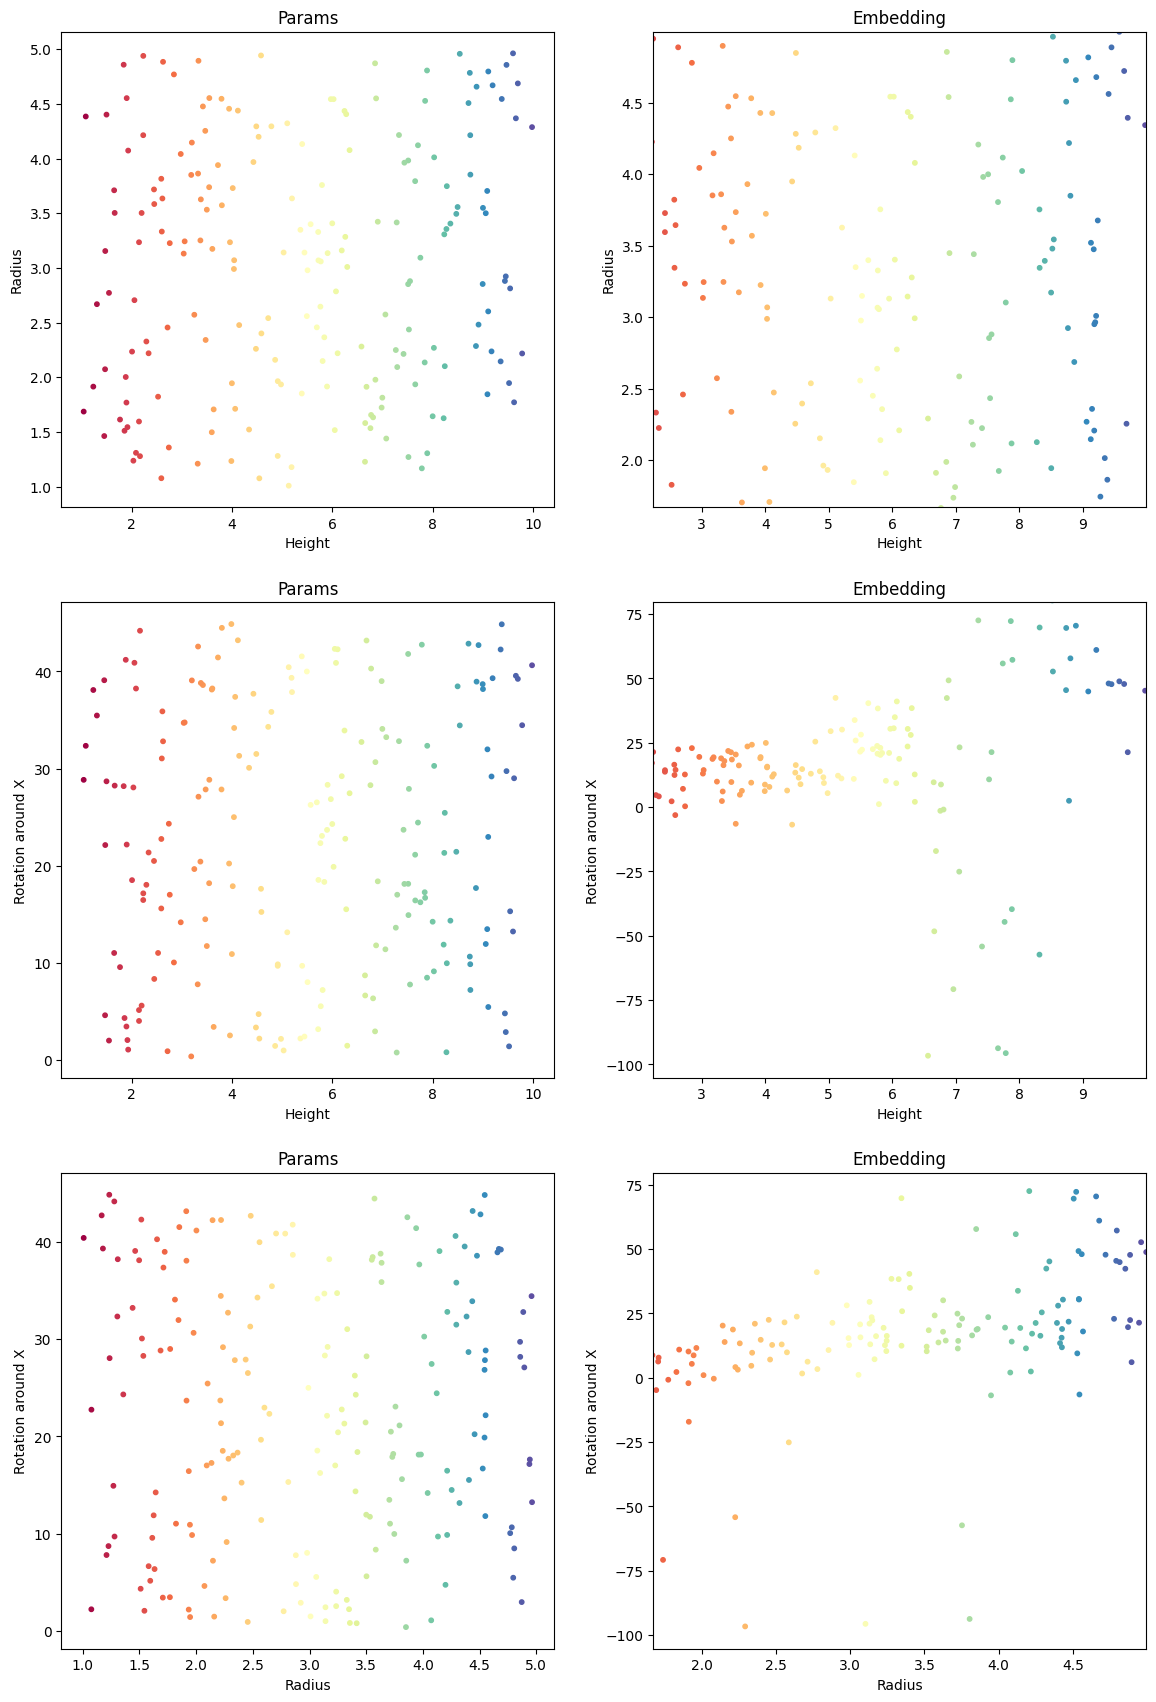

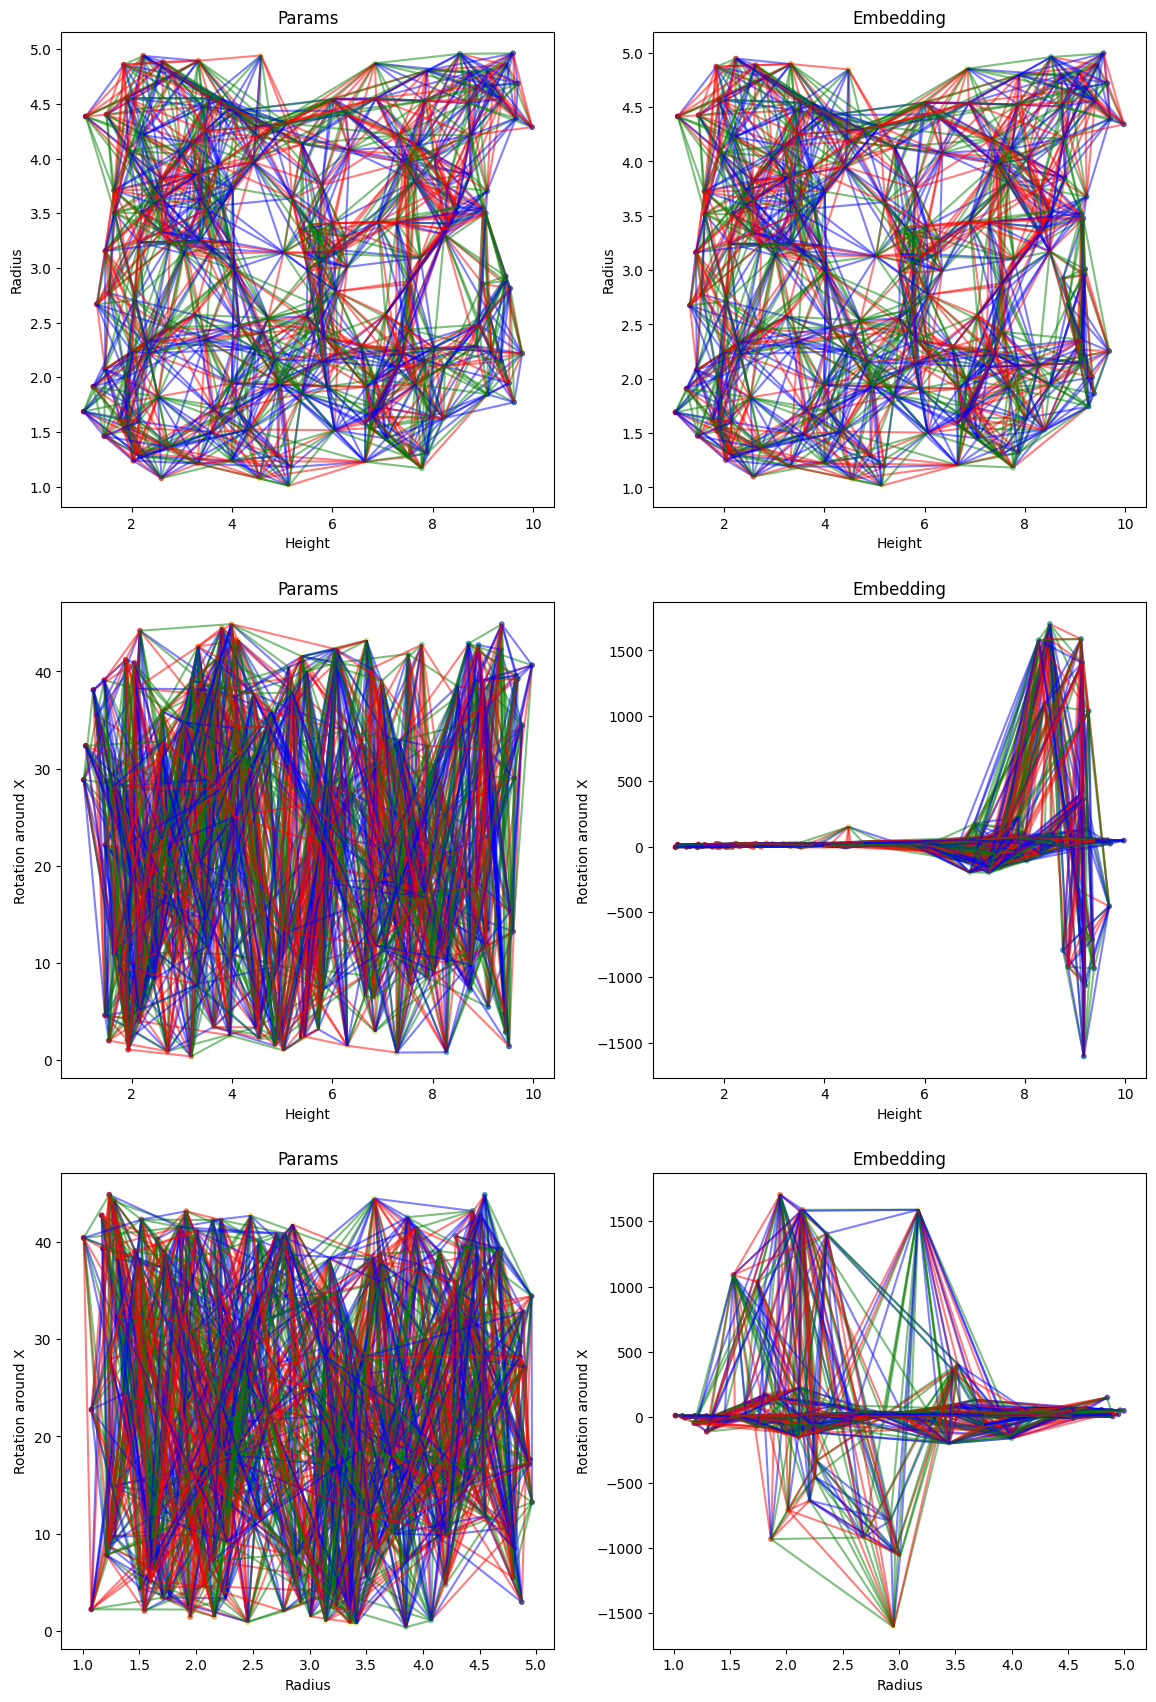

In [11]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names, edges=edges)

-----------
x_opt  = [1.28935228 1.08185995], x_err = 27.40514052020924
x_real = [0.51354198 1.13980689]
-----------
x_opt  = [1.28935228 0.54809227], x_err = 38.530987754686514
x_real = [0.47458005 0.60254709]
-----------
x_opt  = [1.28935228 0.54809227], x_err = 54.23438198782314
x_real = [0.14928699 0.8177466 ]
-----------
x_opt  = [1.28935228 0.54809227], x_err = 247.76918184034915
x_real = [0.35881822 0.02410058]
-----------
x_opt  = [1.81206465 1.01947241], x_err = 0.0019256174752610665
x_real = [1.70940517 0.96012261]
-----------
x_opt  = [1.28935228 0.54809227], x_err = 55.10601958502528
x_real = [1.34025028 0.09479451]
-----------
x_opt  = [1.28935228 0.54809227], x_err = 43.993855359559674
x_real = [0.65917332 0.3820034 ]
-----------
x_opt  = [1.45432172 0.83026433], x_err = 0.002213420464010159
x_real = [1.35515405 0.76949578]
-----------
x_opt  = [1.41927986 0.54809227], x_err = 42.10899132517581
x_real = [1.50591491 0.12444313]
-----------
x_opt  = [1.28935228 0.68206261],

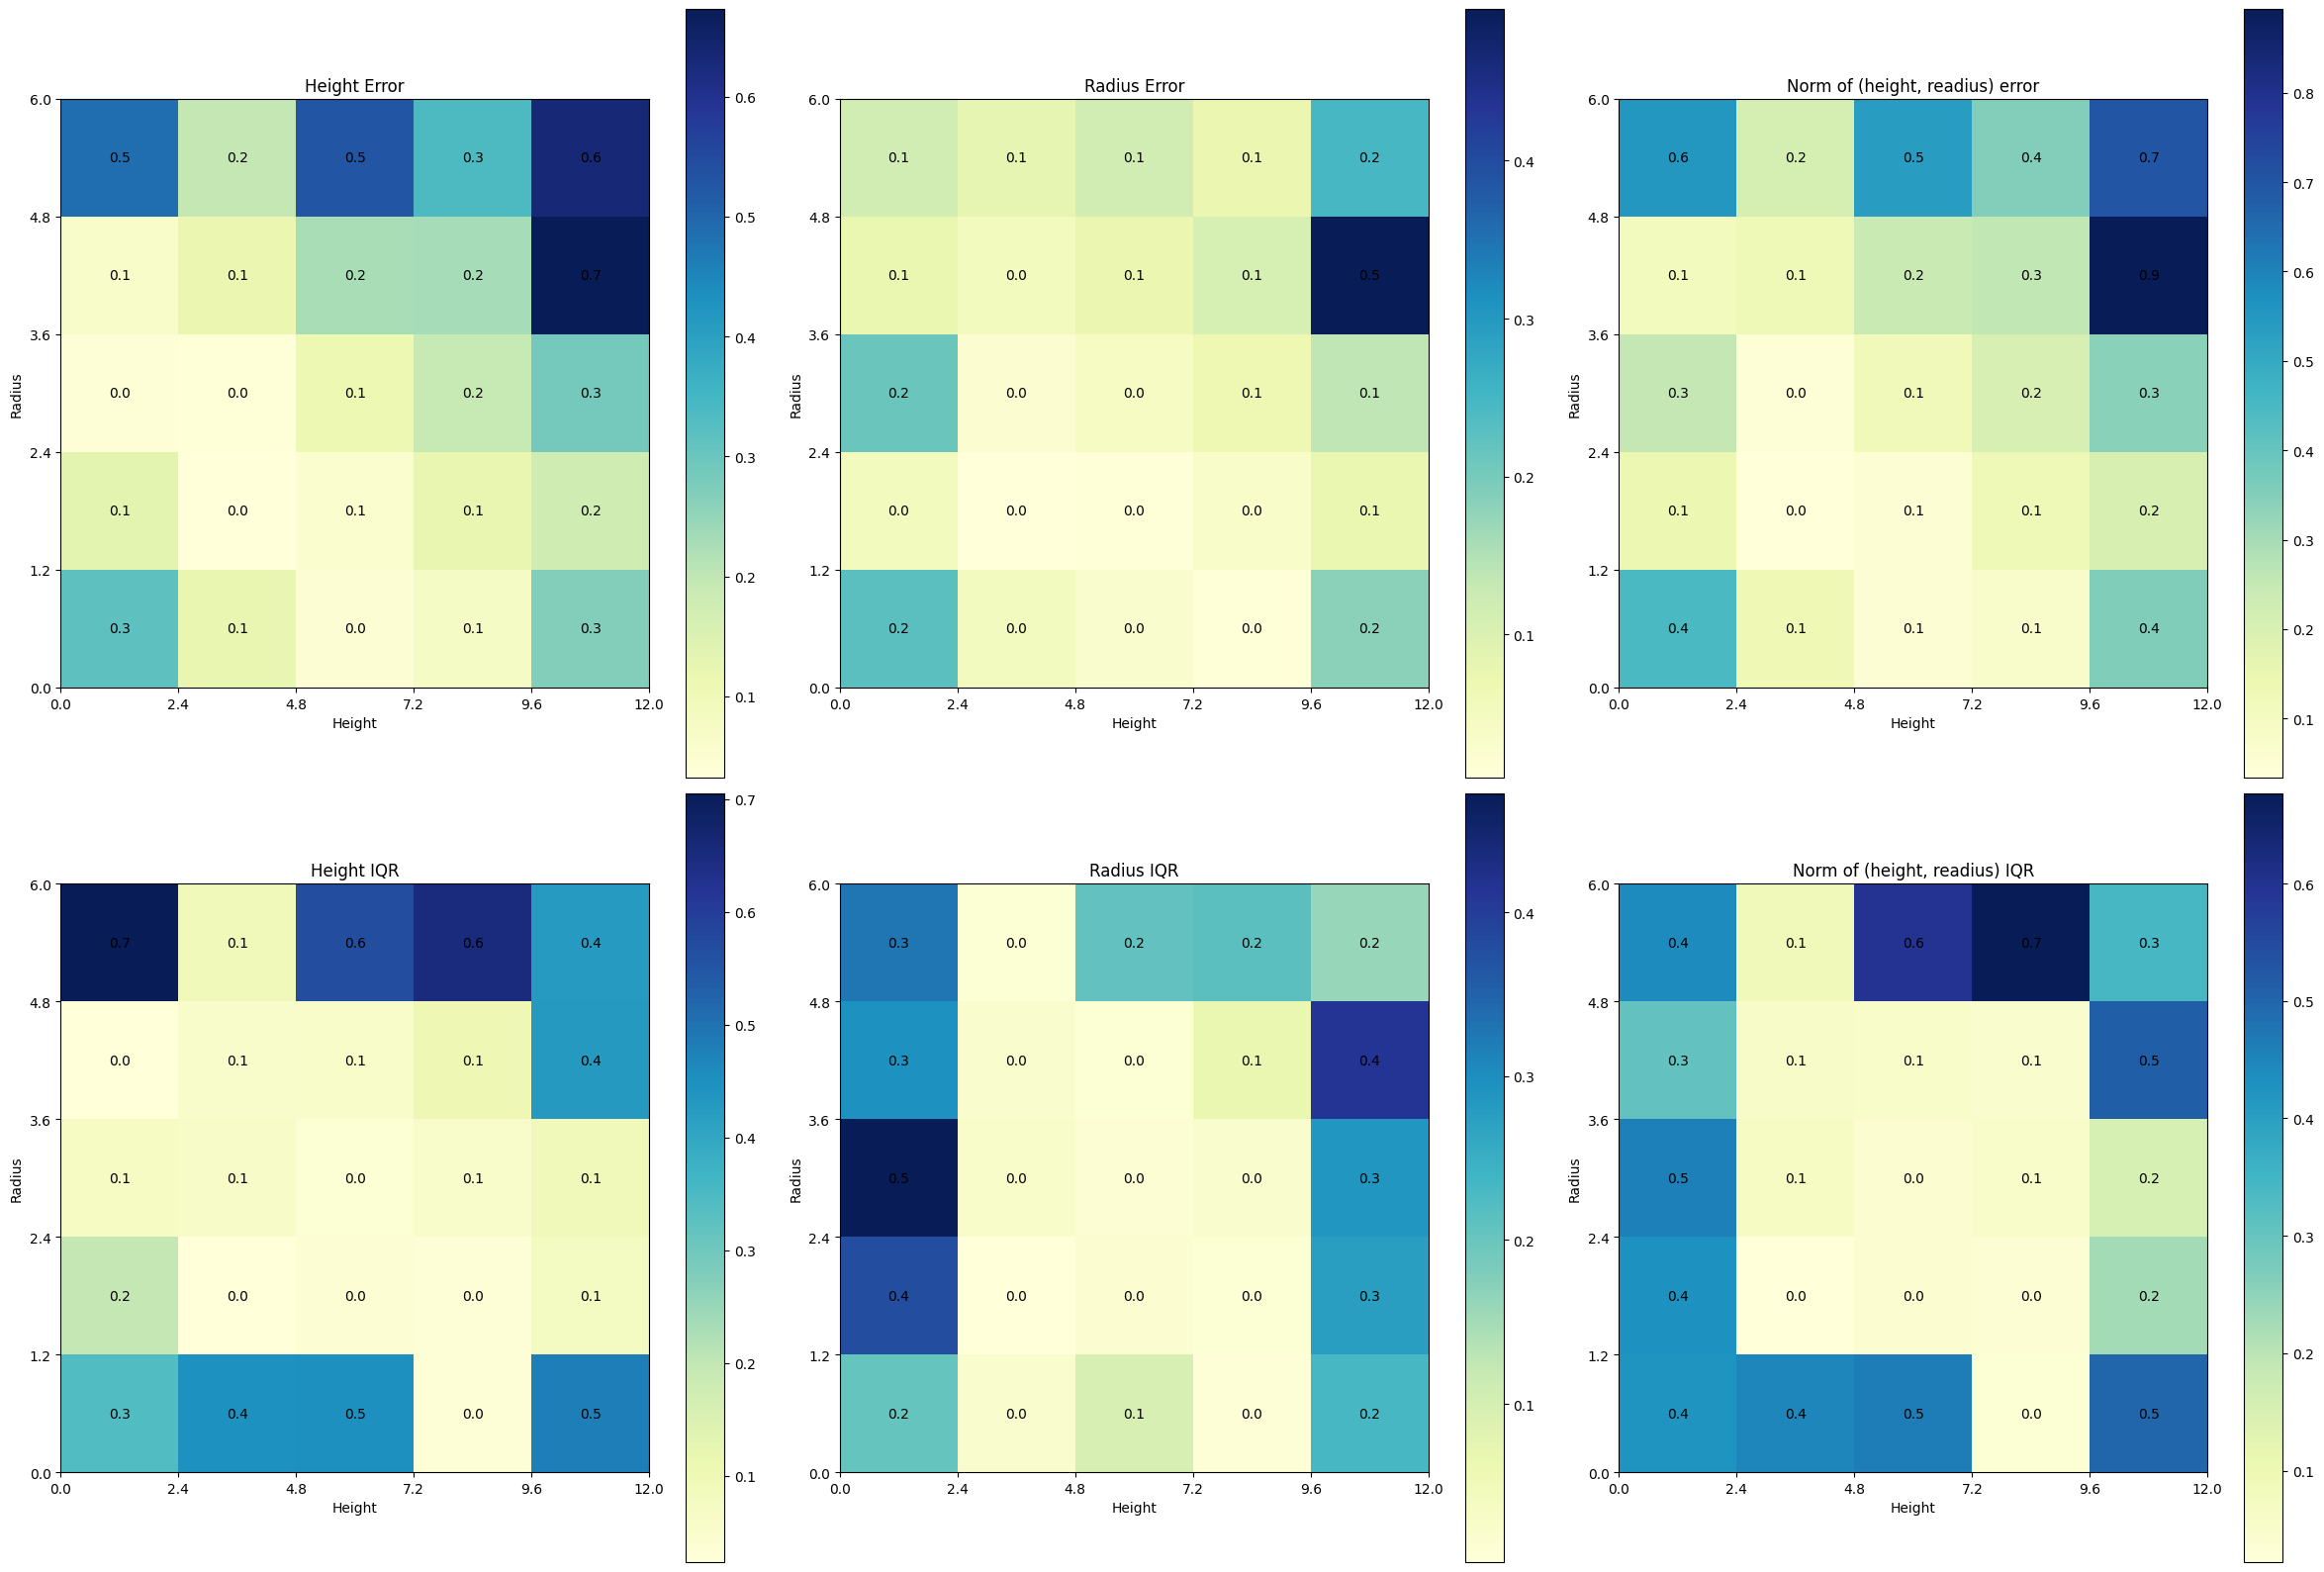

In [6]:
pieces_cnt = 5
test_data_size = 10
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, cyl.generate_cylinder_points, figure_point_cnt,
                                             centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                             x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                             same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556694726
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556727274
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.003176839655677638
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556623225
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108884 1.25260356], x_err = 0.003176839655590911
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556729247
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556564457
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.003176839655660281
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.0031768396556706734
x_real = [2.4 1.2]
-----------
x_opt  = [2.50108881 1.25260354], x_err = 0.003176839655657771
x_real = [2.4 1.2]
[0.10108881 0.10108881 0.10108881 0.10108881 0.1010888

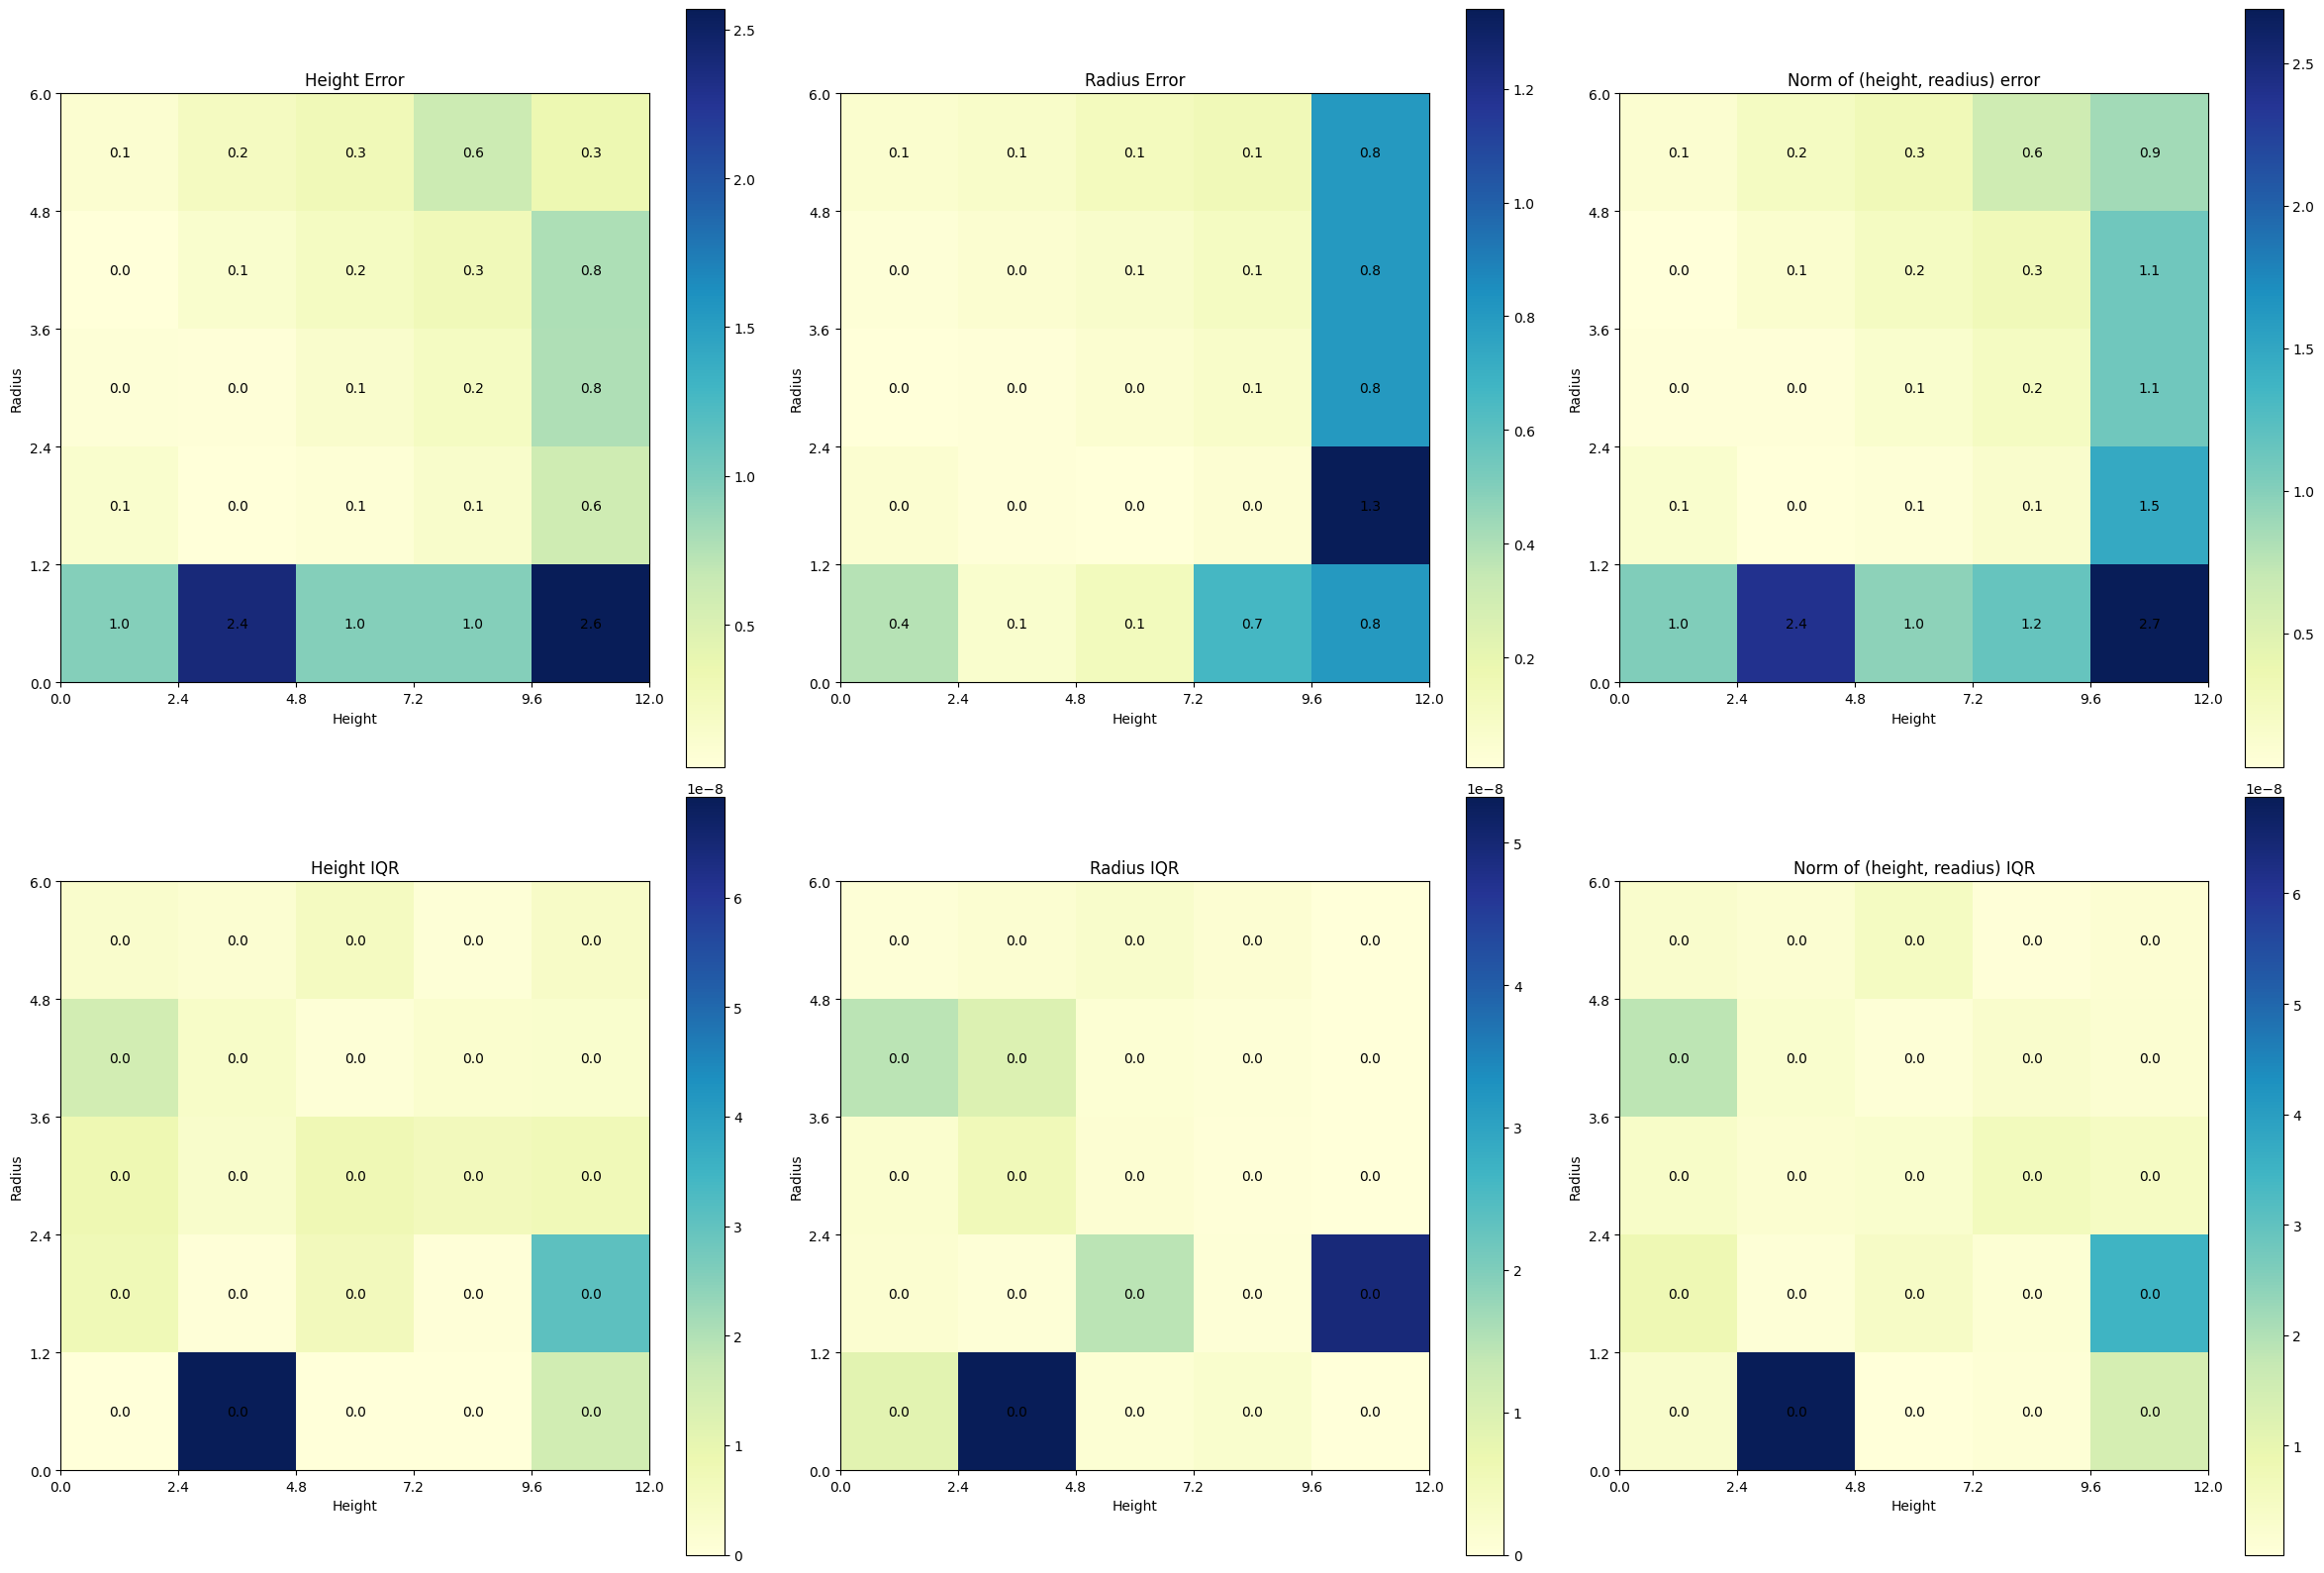

In [7]:
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, cyl.generate_cylinder_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)